# CUNEF MUCD 2021/2022  
## Machine Learning
## Análisis de Siniestralidad de Automóviles

### Autores:
- Andrés Mahía Morado
- Antonio Tello Gómez


In [2]:
# Manipulacion
import pandas as pd
import numpy as np

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
#from matplotlib_dashboard import MatplotlibDashboard
# Métricas 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix # Matriz confusion
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve
from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import pickle
import re
import warnings
warnings.filterwarnings('ignore')
%load_ext autotime

from aux_func import cargar_modelo
from aux_func import evaluate_model
from aux_func import model_analysis

# Cargamos datos

In [6]:
# Load train and test data
xtrain = pd.read_parquet("../data/xtrain.parquet")
ytrain = pd.read_parquet("../data/ytrain.parquet")
xtest = pd.read_parquet("../data/xtest.parquet")
ytest = pd.read_parquet("../data/ytest.parquet")

time: 3.41 s


In [5]:
# Load model data
base = cargar_modelo("../models/modelo_base.pickle")
naive_bayes = cargar_modelo("../models/GNB.pickle")
logistic_ridge = cargar_modelo("../models/LR.pickle")
logistic_lasso = cargar_modelo("../models/LRlasso.pickle")
random_forest = cargar_modelo("../models/RandomForest.pickle")
xgboost = cargar_modelo("../models/XGBoost.pickle")
lightgbm = cargar_modelo("../models/LightGBM.pickle")
adaboost = cargar_modelo("../models/AdaBoost.pickle")
catboost = cargar_modelo("../models/CatBoost.pickle")

time: 2.48 s (started: 2021-12-18 20:59:42 +01:00)


# Selección de Modelos

En este apartado utilizaremos la función model_analysis que hemos creado para este trabajo, la cual nos permitirá observar para cada uno de los modelos que hemos generado las siguientes características:

- Curva ROC del modelo

- Curva ROC del modelo + ajuste de threshold representado visualmente

- Classification report

- Matrices de confusión del modelo (normalizada y no normalizada)

## Modelo base 

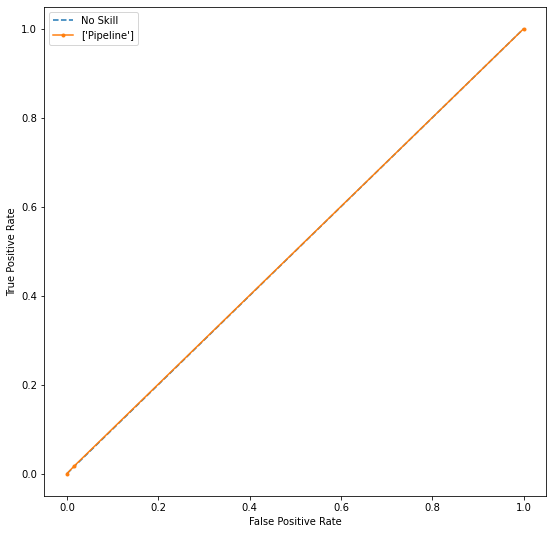

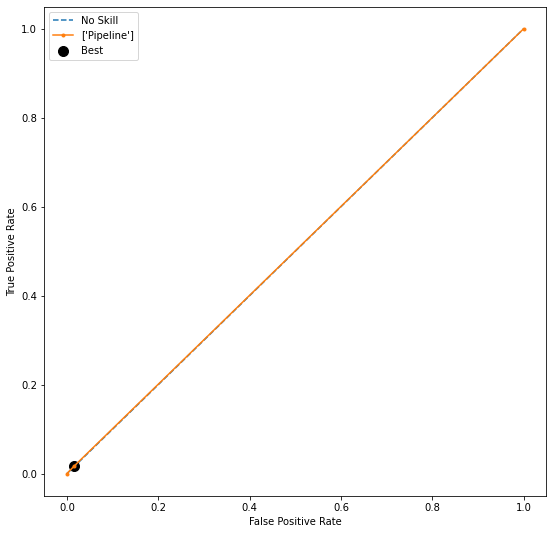

ROC-AUC score of the model: 0.5006305803052006
Accuracy of the model: 0.984867717181069

Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    799946
           1       0.00      0.00      0.00     12291

    accuracy                           0.98    812237
   macro avg       0.49      0.50      0.50    812237
weighted avg       0.97      0.98      0.98    812237


Confusion matrix: 
[[799946      0]
 [ 12291      0]]



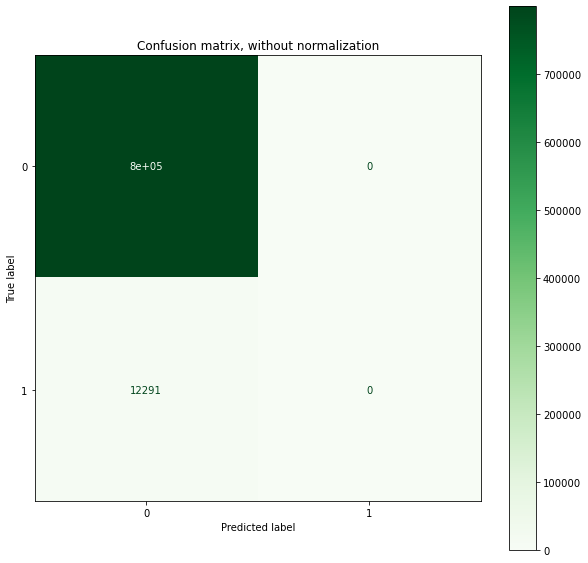

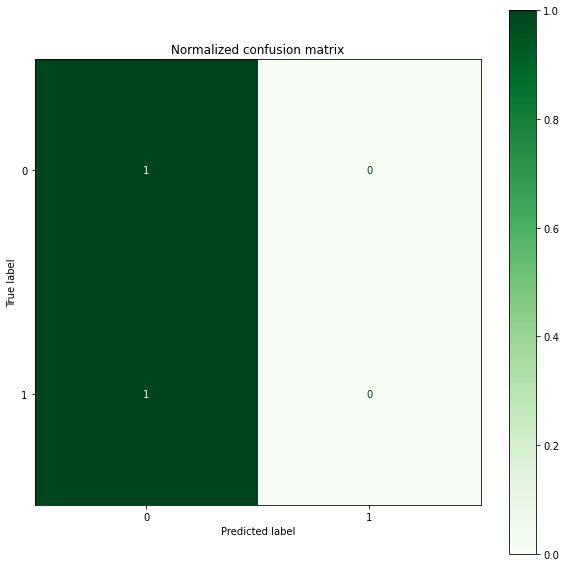

time: 8.49 s (started: 2021-12-18 20:59:47 +01:00)


In [6]:
model_analysis(base, xtest, ytest)

## Naive-Bayes

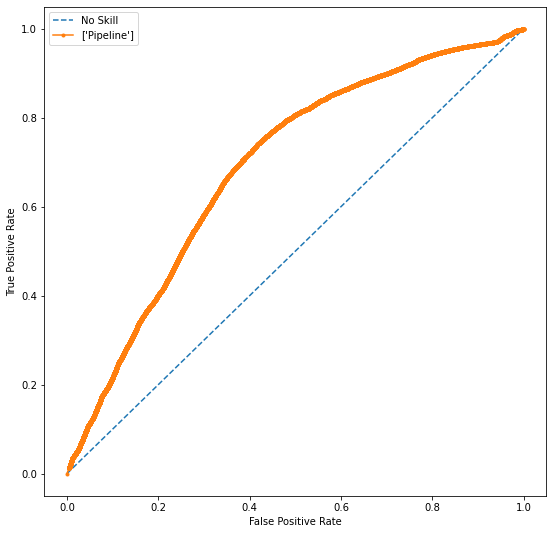

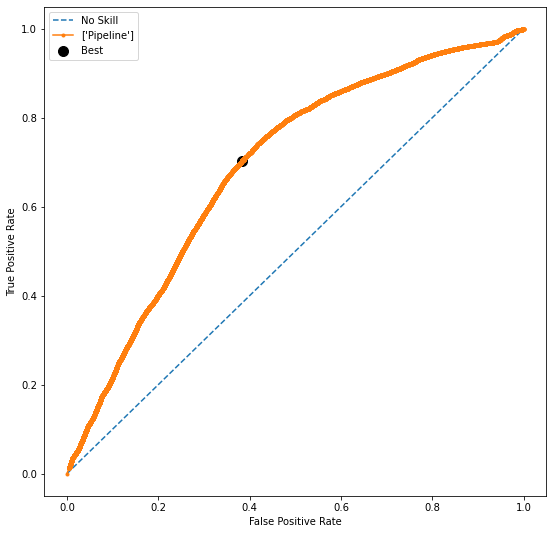

ROC-AUC score of the model: 0.6915075906932969
Accuracy of the model: 0.6182862883616481

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.62      0.76    799946
           1       0.03      0.70      0.05     12291

    accuracy                           0.62    812237
   macro avg       0.51      0.66      0.41    812237
weighted avg       0.98      0.62      0.75    812237


Confusion matrix: 
[[493556 306390]
 [  3652   8639]]



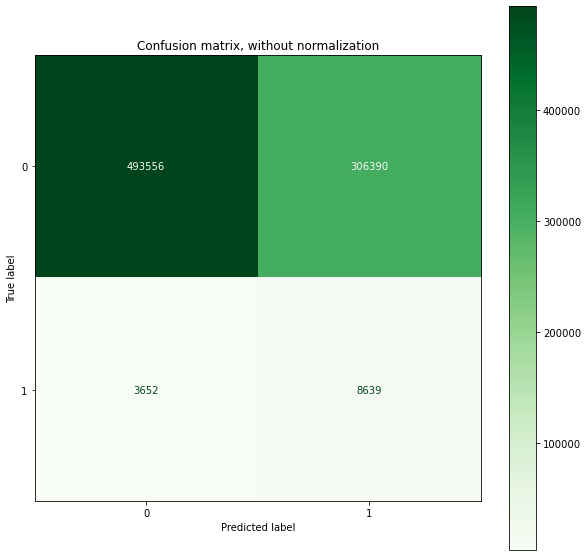

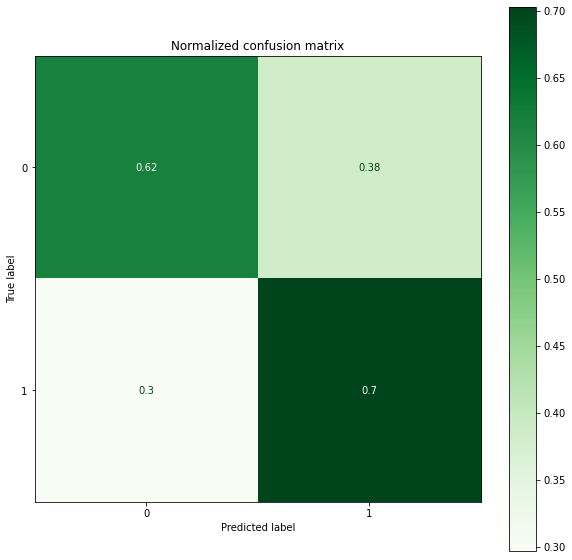

time: 10 s (started: 2021-12-18 21:00:09 +01:00)


In [7]:
model_analysis(naive_bayes, xtest, ytest)

## Regresión Logística (Ridge)

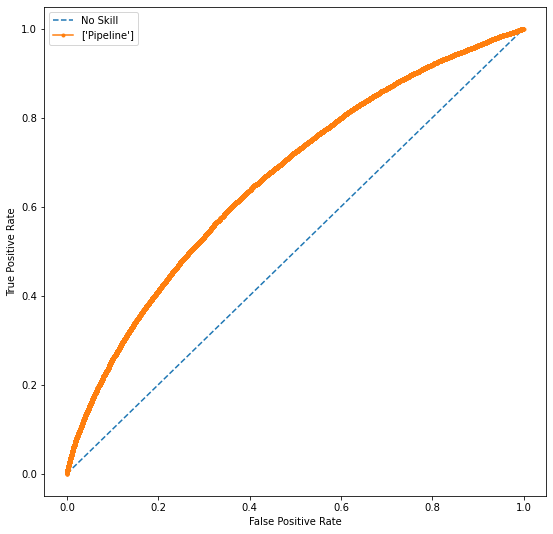

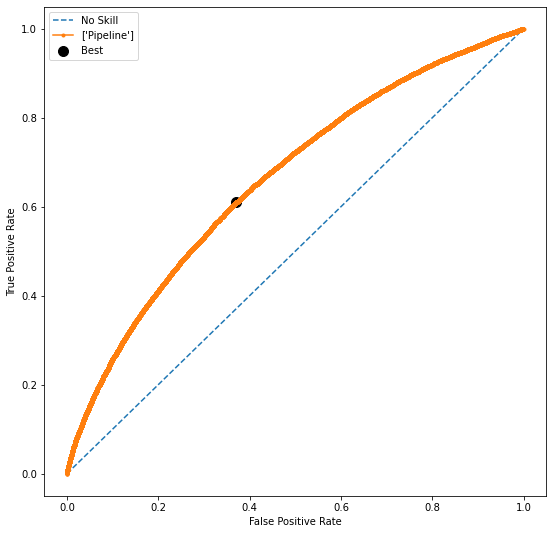

ROC-AUC score of the model: 0.6638737043132967
Accuracy of the model: 0.6292387566683123

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.63      0.77    799946
           1       0.02      0.61      0.05     12291

    accuracy                           0.63    812237
   macro avg       0.51      0.62      0.41    812237
weighted avg       0.98      0.63      0.76    812237


Confusion matrix: 
[[503598 296348]
 [  4798   7493]]



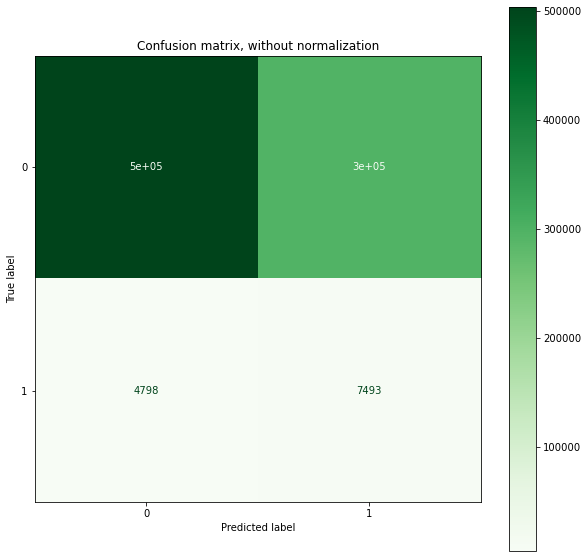

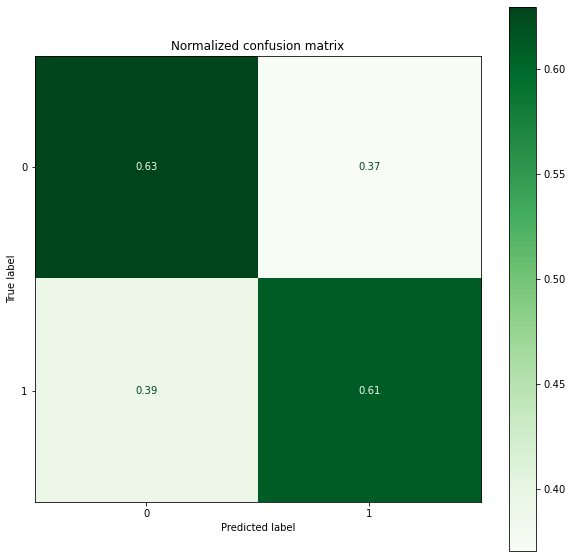

time: 8.92 s (started: 2021-12-18 21:00:19 +01:00)


In [8]:
model_analysis(logistic_ridge, xtest, ytest)

## Regresión Logística (Lasso)

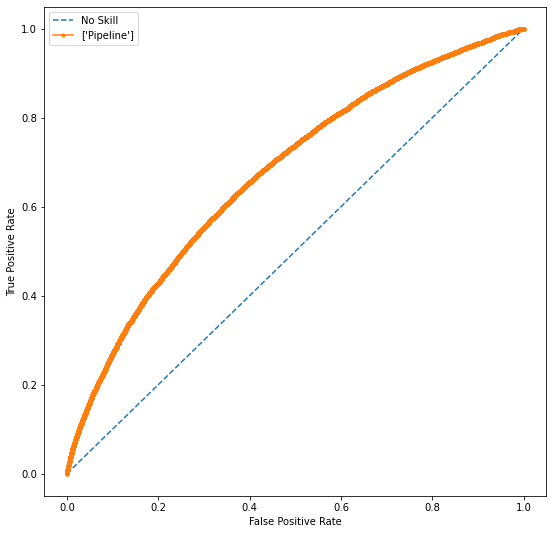

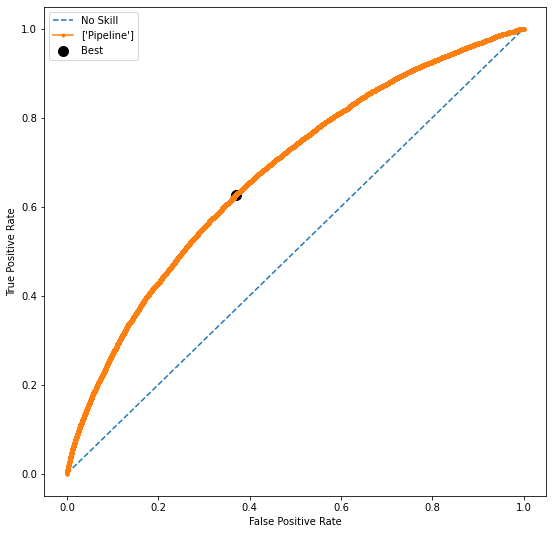

ROC-AUC score of the model: 0.6762134387281621
Accuracy of the model: 0.6299516027957357

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.63      0.77    799946
           1       0.03      0.63      0.05     12291

    accuracy                           0.63    812237
   macro avg       0.51      0.63      0.41    812237
weighted avg       0.98      0.63      0.76    812237


Confusion matrix: 
[[503965 295981]
 [  4586   7705]]



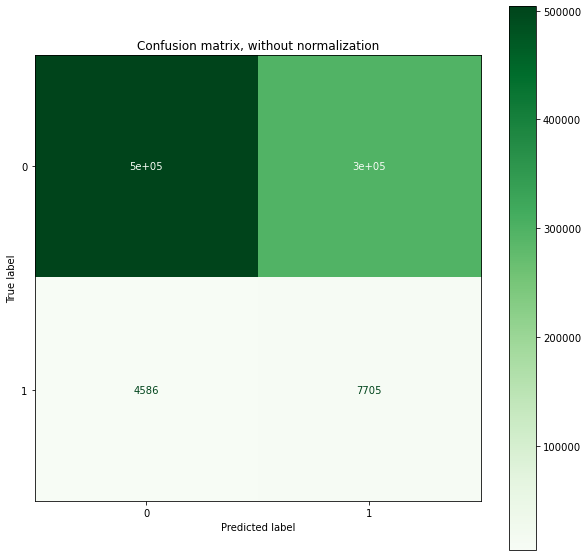

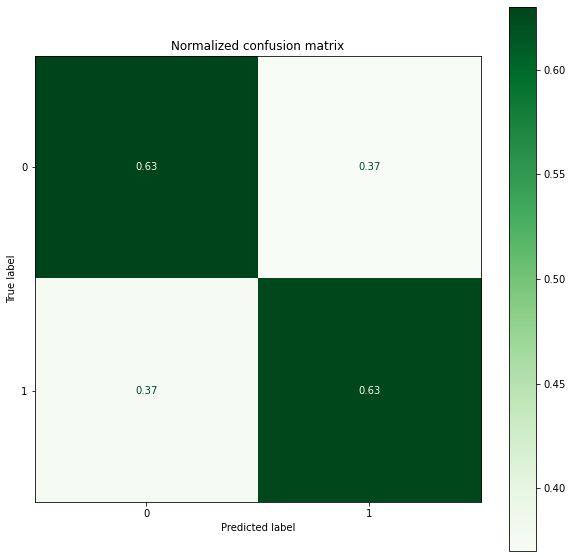

time: 15.1 s


In [8]:
model_analysis(logistic_lasso, xtest, ytest)

## Random Forest

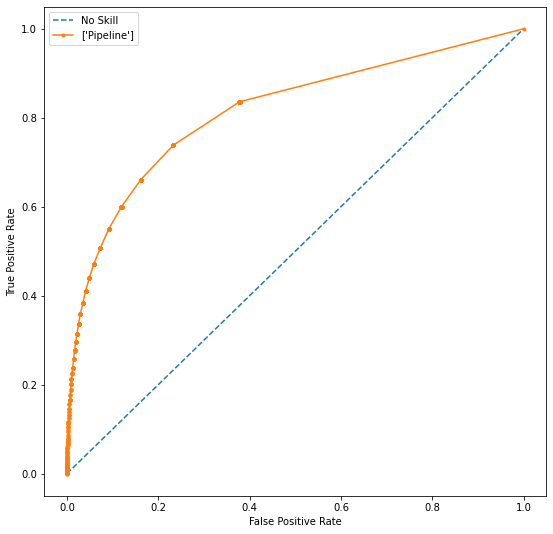

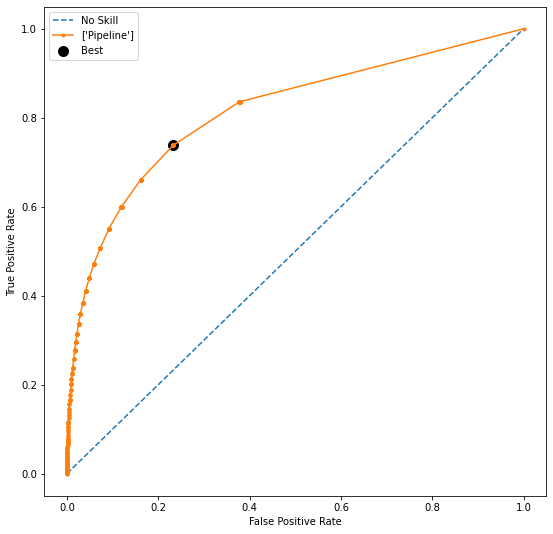

ROC-AUC score of the model: 0.8140237381469512
Accuracy of the model: 0.767305601690147

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.77      0.87    799946
           1       0.05      0.74      0.09     12291

    accuracy                           0.77    812237
   macro avg       0.52      0.75      0.48    812237
weighted avg       0.98      0.77      0.85    812237


Confusion matrix: 
[[614163 185783]
 [  3220   9071]]



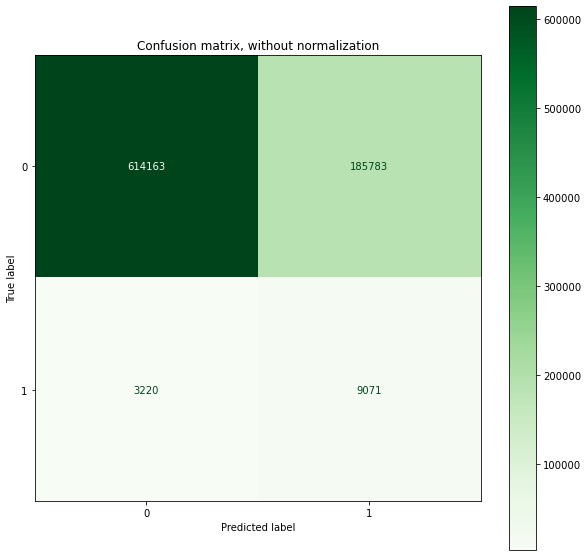

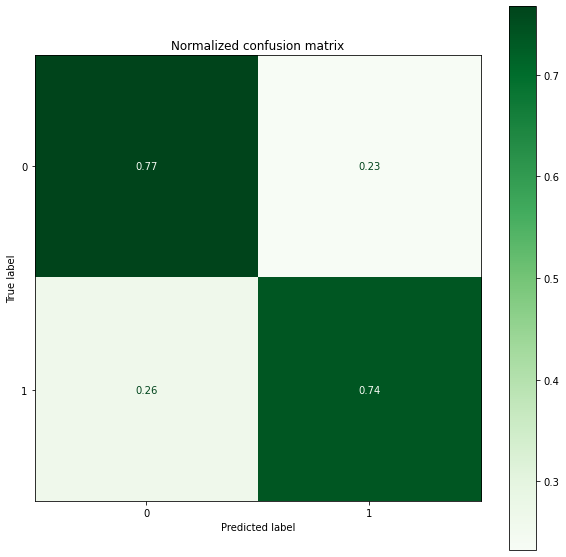

time: 19.9 s (started: 2021-12-18 21:00:29 +01:00)


In [9]:
model_analysis(random_forest, xtest, ytest)

## XGBoost

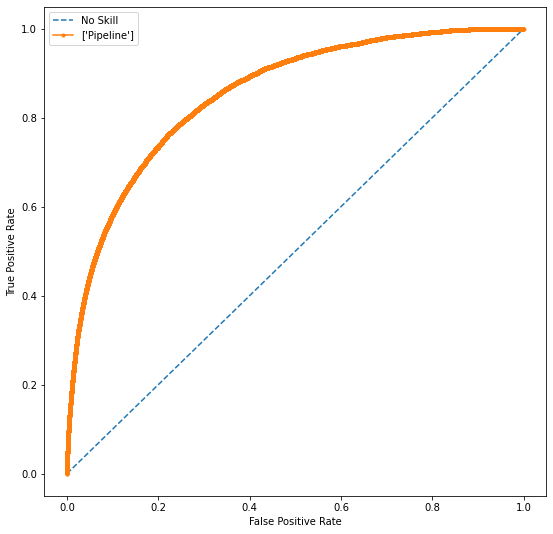

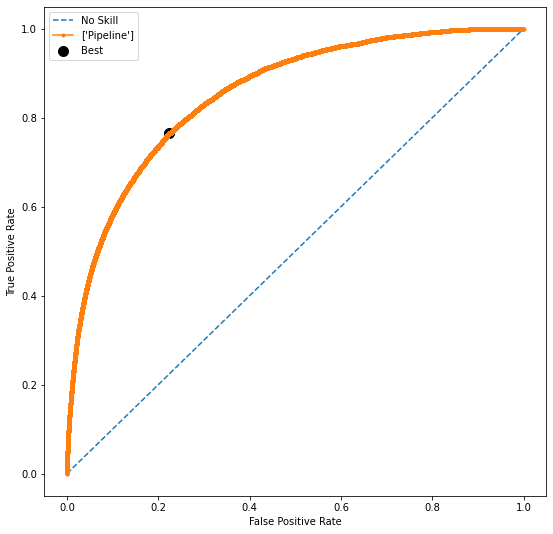

ROC-AUC score of the model: 0.8541541641828294
Accuracy of the model: 0.775515028249144

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.78      0.87    799946
           1       0.05      0.77      0.09     12291

    accuracy                           0.78    812237
   macro avg       0.52      0.77      0.48    812237
weighted avg       0.98      0.78      0.86    812237


Confusion matrix: 
[[620499 179447]
 [  2888   9403]]



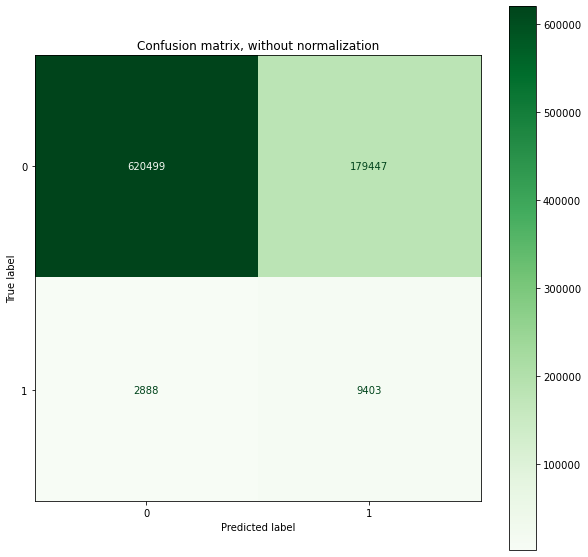

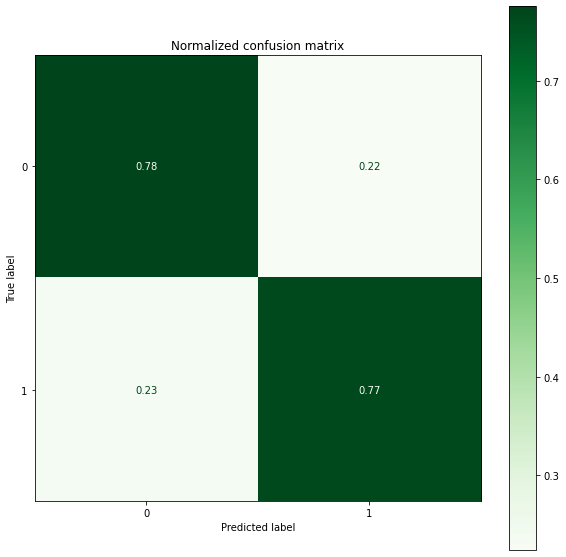

time: 10.1 s (started: 2021-12-18 21:00:49 +01:00)


In [10]:
model_analysis(xgboost, xtest, ytest)

## LightGBM

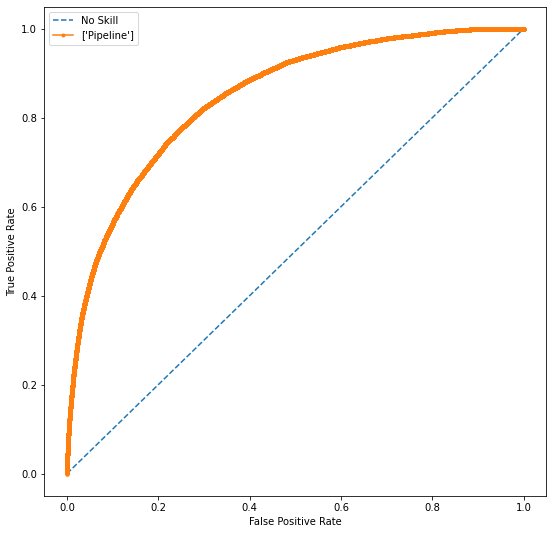

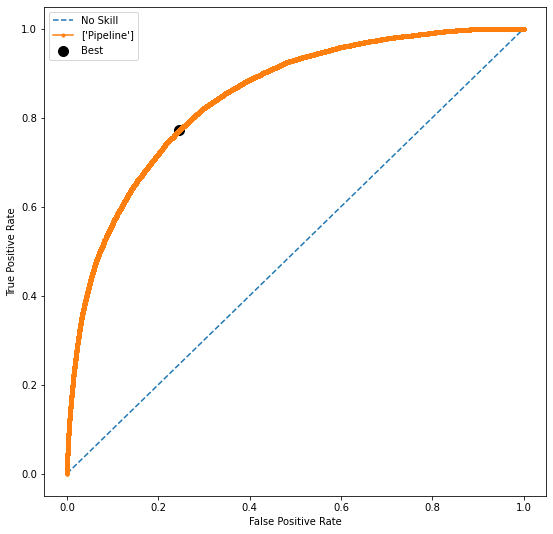

ROC-AUC score of the model: 0.8473477473418336
Accuracy of the model: 0.7555910405460475

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.76      0.86    799946
           1       0.05      0.77      0.09     12291

    accuracy                           0.76    812237
   macro avg       0.52      0.76      0.47    812237
weighted avg       0.98      0.76      0.85    812237


Confusion matrix: 
[[604238 195708]
 [  2810   9481]]



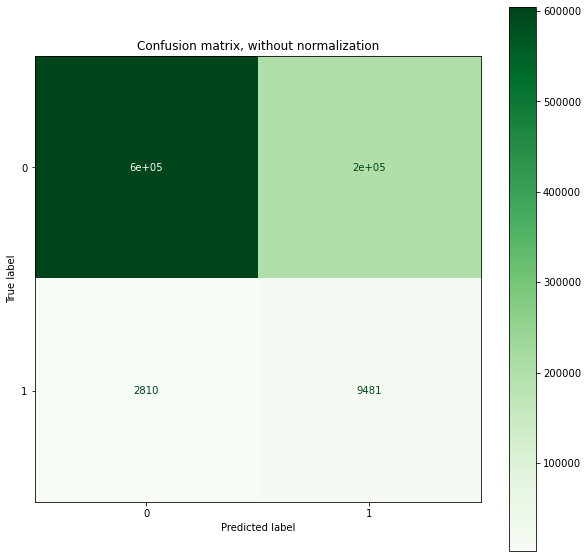

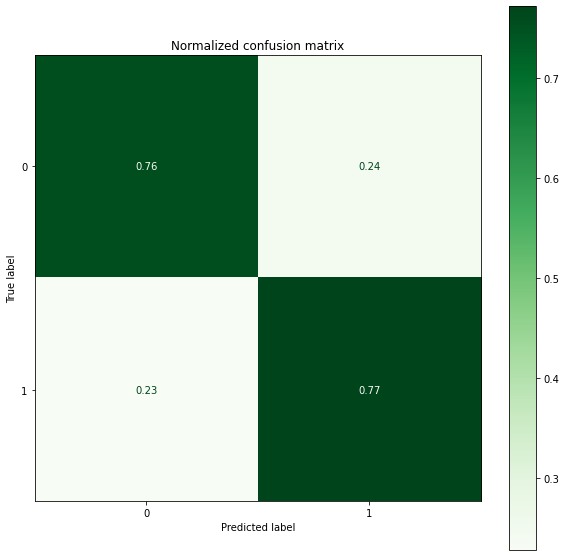

time: 11.1 s (started: 2021-12-18 21:00:59 +01:00)


In [11]:
model_analysis(lightgbm, xtest, ytest)

## ADABoost

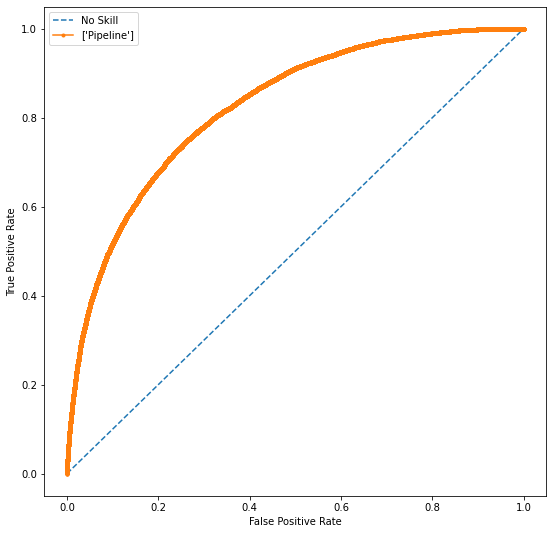

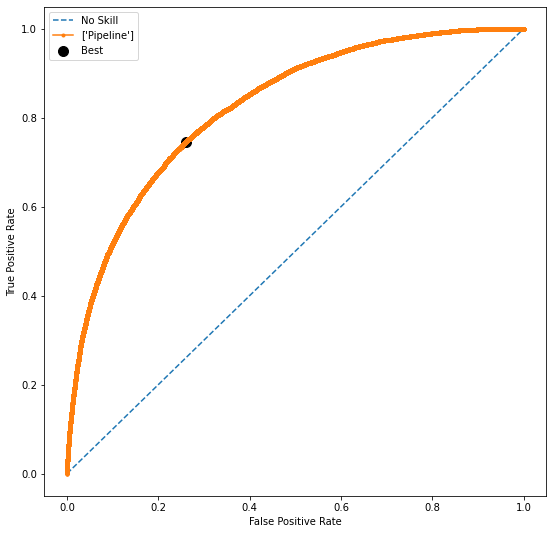

ROC-AUC score of the model: 0.8252876879924893
Accuracy of the model: 0.7402199111835585

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.74      0.85    799946
           1       0.04      0.75      0.08     12291

    accuracy                           0.74    812237
   macro avg       0.52      0.74      0.46    812237
weighted avg       0.98      0.74      0.84    812237


Confusion matrix: 
[[592068 207878]
 [  3125   9166]]



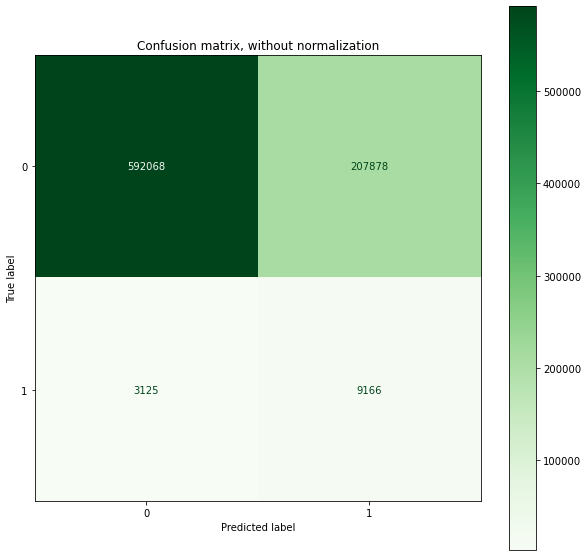

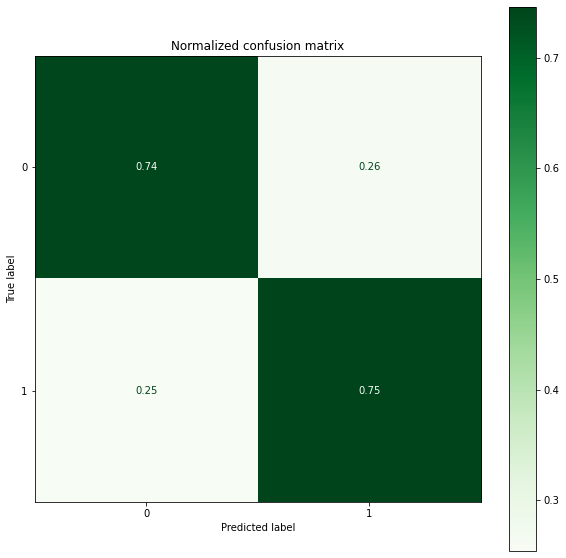

time: 44.1 s (started: 2021-12-18 21:01:10 +01:00)


In [12]:
model_analysis(adaboost, xtest, ytest)

## CatBoost

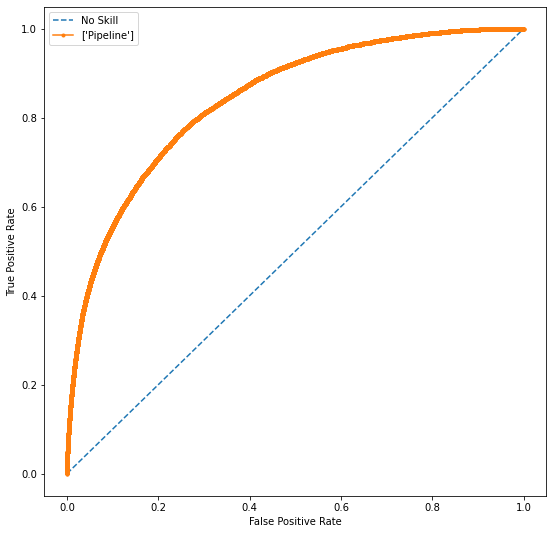

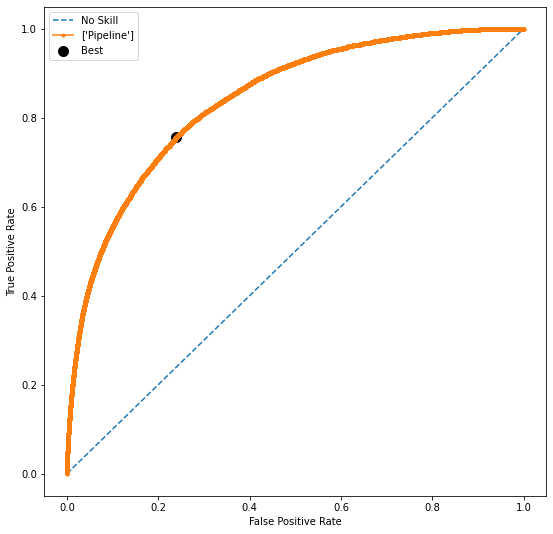

ROC-AUC score of the model: 0.8421572963538151
Accuracy of the model: 0.7612556433651755

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.76      0.86    799946
           1       0.05      0.76      0.09     12291

    accuracy                           0.76    812237
   macro avg       0.52      0.76      0.48    812237
weighted avg       0.98      0.76      0.85    812237


Confusion matrix: 
[[609032 190914]
 [  3003   9288]]



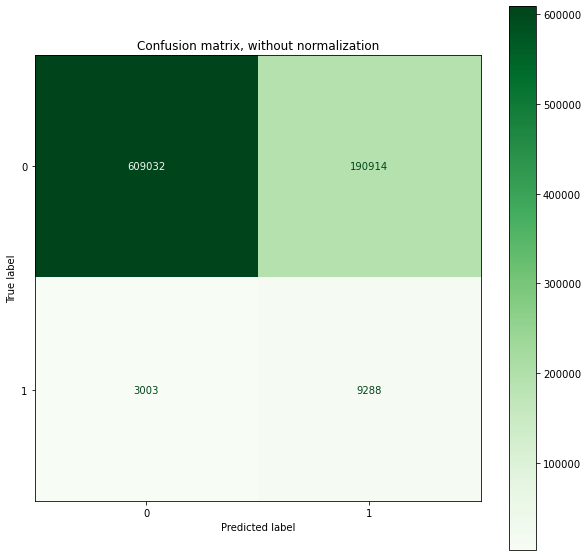

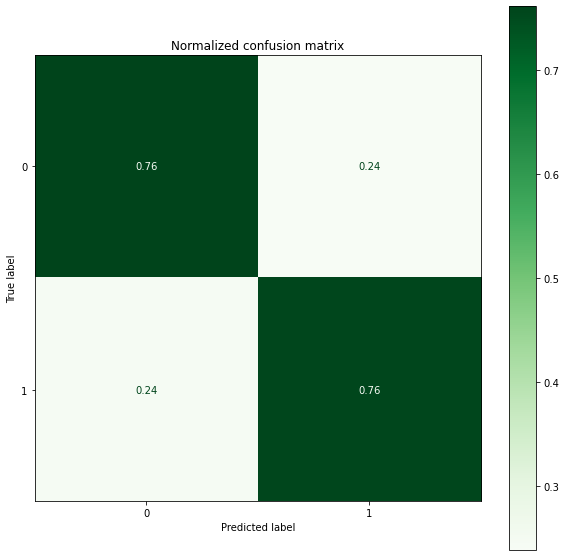

time: 28.5 s (started: 2021-12-18 21:01:54 +01:00)


In [13]:
model_analysis(catboost, xtest, ytest)

## Resumen comparativo

In [3]:
# Tabla con los datos de cada modelo

datos_modelos = {'Modelo': ['Modelo base', 'Naive-Bayes', 'Ridge', 'Lasso', 'Random Forest','XGBoost','LightGBM', 'ADABoost', 'Catboost'],

                'Accuracy': ['0.98', '0.62', '0.63', '0.63', '0.77', '0.77', '0.75', '0.74', '0.76'],

                'ROC-AUC': ['0.5', '0.69', '0.66', '0.68', '0.81', '0.85', '0.85', '0.82', '0.84'],

                'False positives': ['0', '0.38', '0.37', '0.37', '0.22', '0.25', '0.24', '0.26', '0.24'],

                'True positives': ['0', '0.70', '0.61', '0.63', '0.77', '0.78', '0.77', '0.75', '0.76'],

                'Runtime (s)':['1', '6', '816', '102', '260', '141', '15', '562', '196']}

tabla_modelos = pd.DataFrame(datos_modelos, columns=['Modelo', 'Accuracy', 'ROC-AUC', 'False positives',
                                                    'True positives', 'Runtime (s)'])

time: 9.01 ms


Hemos generado una tabla que nos permite realizar una comparación de los resultados y componentes principales a la hora de evaluar los modelos para nuestro caso en concreto.
Es necesario recordar que el objetivo de este trabajo es tratar de predecir la mortalidad en accidentes de tráfico, lo cual nos coloca en un entorno con un dataset extremadamente desbalanceado.

Como consecuencia de este desbalanceo, las métricas que debemos utilizar para evaluar la calidad de nuestras predicciones se ven alteradas respecto de un caso de clasificación más balanceado.
Hemos seleccionado los siguientes valores de cada modelo:

- **Accuracy**: Porcentaje total de los valores que ha sido predicho correctamente. No debemos darle una importancia desmesurada ya que al tratarse de una clasificación desbalanceada no tiene por qué significar la superioridad de un modelo en concreto.

- **ROC-AUC**: Área por debajo de la curva ROC. A mayor valor del ROC-AUC, mayor es el cociente entre los *true positives* y los *false positives*. Evaluaremos de manera positiva tener un mayor ROC-AUC.

- **False positive rate**: El porcentaje de valores (dentro del total de valores negativos) que clasificamos desde nuestro modelo como positivos, pero resultan ser negativos. Lo evaluaremos de manera negativa.

- **True positive rate**: El porcentaje de valores (dentro del total de valores positivos) que clasificamos como positivos. Lo evaluaremos de manera positiva.

- **Runtime o tiempo de ejecución**: Representa el tiempo que ha tardado el modelo en ajustarse a los datos de entrenamiento. Evaluaremos de manera negativa tener un mayor tiempo de ejecución.


![Highway](https://camo.githubusercontent.com/716b289f76220a2f1e3a9b8f46e44ef466a94c38afd366f8ce9bcf9dcc0bd507/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f652f65372f53656e73697469766974795f616e645f73706563696669636974792e7376672f33353070782d53656e73697469766974795f616e645f73706563696669636974792e7376672e706e67)

In [4]:
tabla_modelos

,Modelo,Accuracy,ROC-AUC,False positives,True positives,Runtime (s)
0,Modelo base,0.98,0.5,0,0,1
1,Naive-Bayes,0.62,0.69,0.38,0.70,6
2,Ridge,0.63,0.66,0.37,0.61,816
3,Lasso,0.63,0.68,0.37,0.63,102
4,Random Forest,0.77,0.81,0.22,0.77,260
5,XGBoost,0.77,0.85,0.25,0.78,141
6,LightGBM,0.75,0.85,0.24,0.77,15
7,ADABoost,0.74,0.82,0.26,0.75,562
8,Catboost,0.76,0.84,0.24,0.76,196


time: 54 ms


## ¿Qué modelo(s) optimizaremos?

Descartamos los modelos Base, Naive-Bayes, Ridge y Lasso por la baja tasa de *true positives* que nos brindan. Nuestro objetivo principal es la predicción de la *mortalidad (clase 1)*, asumiendo cierto coste de oportunidad perdido en la predicción de la *no-mortalidad (clase 0)*

El modelo **Random Forest** predijo el 77% de las muertes y a cambio falló en un 22% de los accidentes no mortales. Su tiempo de ejecución se encuentra a mitad de la tabla.

El modelo **XGBoost** obtuvo buenos resultados, teniendo el segundo más bajo de los tiempos de ejecución y obteniendo el mejor resultado en cuanto a los *true positives*

El modelo **LightGBM** obtuvo resultados muy parecidos a XGBoost y destacó en el apartado de tiempo de ejecución, con tan solo 15 segundos.

El modelo **ADA Boost** se vió superado por los demás modelos de boosting, obteniendo los peores resultados de estos y con un tiempo de ejecución mucho mayor, de 562 segundos.

El modelo **Cat Boost** obtuvo resultados relativamente buenos y un tiempo de ejecución razonable.

## Decisión

Teniendo en cuenta todo esto, hemos decidido llevar a la siguiente fase del proyecto los modelos LightGBM y Random Forest. Las razones son las siguientes:

- **LightGBM** fue muy eficiente en cuanto a nivel de computación y sus resultados fueron prácticamente homólogos a los obtenidos mediante del uso de XGBoost, por lo que lo optimizaremos.

- **Random Forest** es un modelo que tiende a volverse más robusto cuanto más profundo e intensivo es su entrenamiento, por lo que a pesar de haber obtenido peores resultados que los modelos de boosting intentaremos optimizarlo.